# 4.3. Profiling your code line-by-line with line_profiler

In [1]:
import numpy as np
%load_ext line_profiler

In [2]:
%%writefile simulation.py
import numpy as np

def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape)<.5) - 1

def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i,:], bins)[0]
                   for i in range(iterations)])
    return y

In [3]:
from simulation import simulate

In [4]:
%lprun -T lprof0 -f simulate simulate(50)

*** Profile printout saved to text file 'lprof0'.


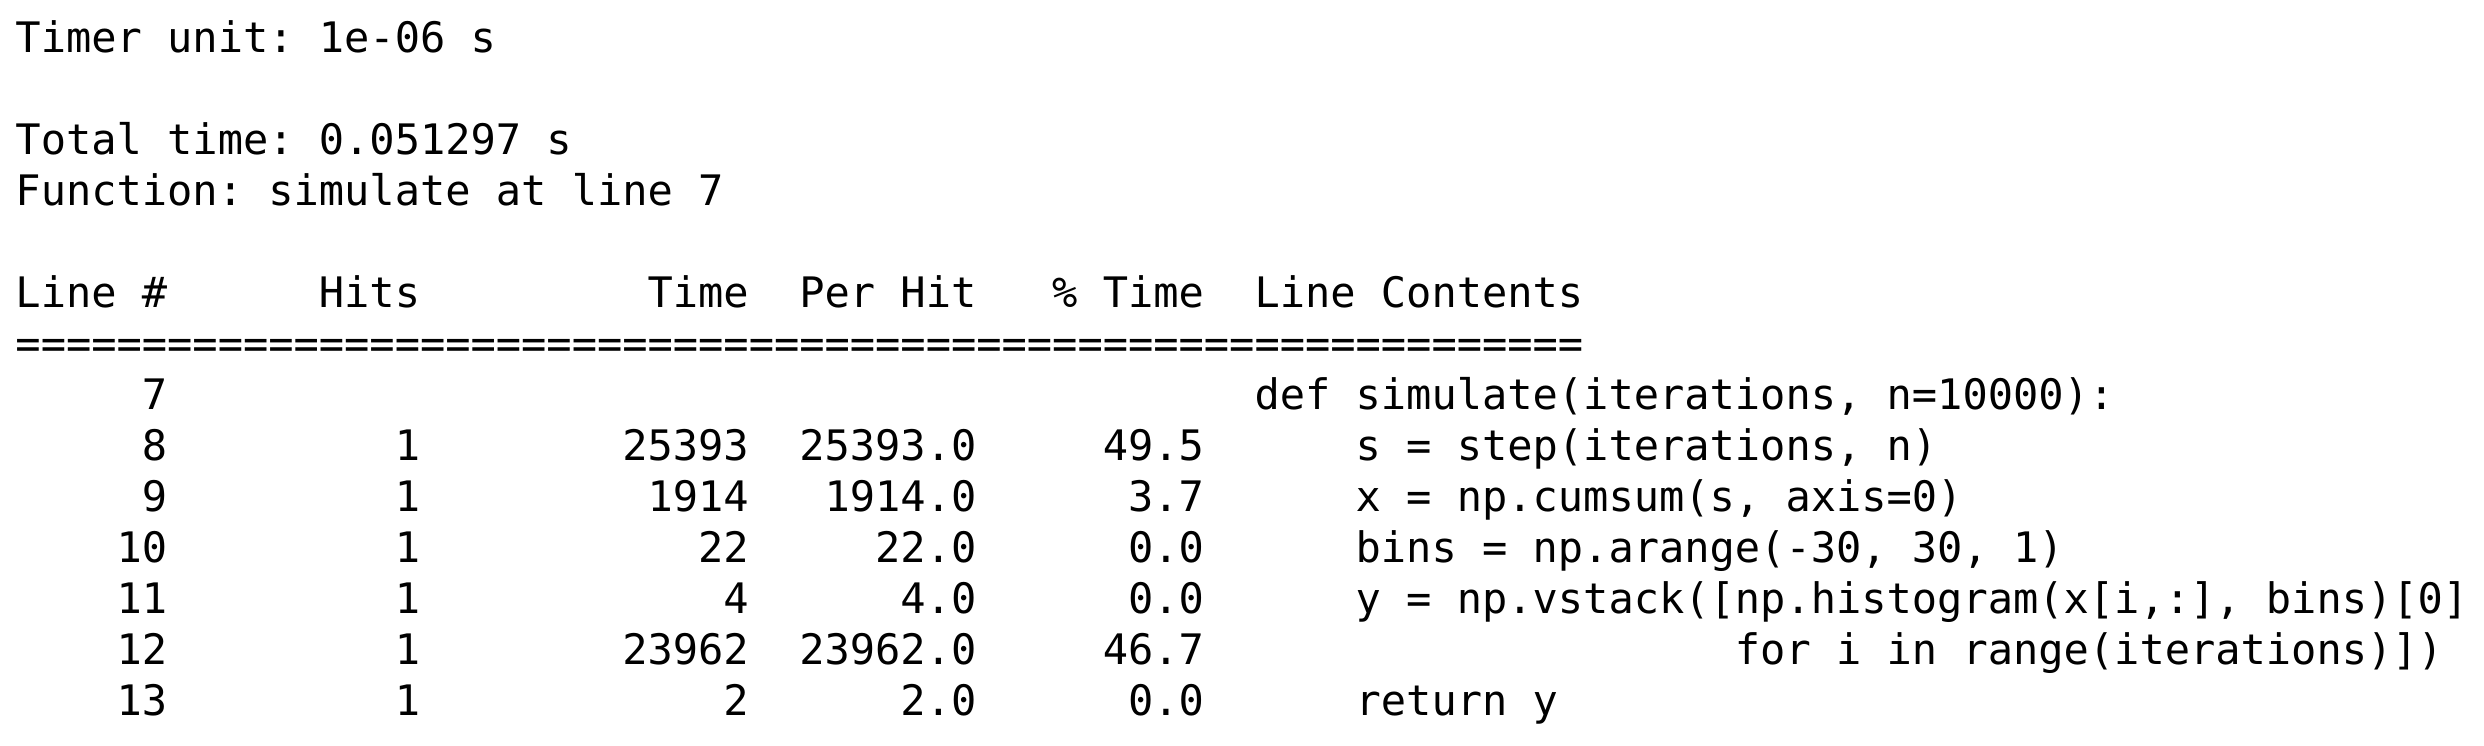

In [5]:
print(open('lprof0', 'r').read())